# Linear Regression
#### Nurseiit Abdimomyn 20172001

A linear regression learning algorithm example using TensorFlow library.


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

rng = np.random

In [4]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [5]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [6]:
# tf Graph Input
X = tf.placeholder('float')
Y = tf.placeholder('float')

# Set model weights
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

In [9]:
# Construct a linear model
Y_hat = tf.add(tf.multiply(X, W), b)

In [10]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y-Y_hat,2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.094813056 W= 0.32438087 b= 0.2634524
Epoch: 0100 cost= 0.092749894 W= 0.3199329 b= 0.2954508
Epoch: 0150 cost= 0.090925232 W= 0.3157494 b= 0.32554618
Epoch: 0200 cost= 0.089311533 W= 0.31181487 b= 0.353851
Epoch: 0250 cost= 0.087884367 W= 0.30811417 b= 0.3804731
Epoch: 0300 cost= 0.086622193 W= 0.3046337 b= 0.40551198
Epoch: 0350 cost= 0.085506052 W= 0.30136025 b= 0.42906064
Epoch: 0400 cost= 0.084518947 W= 0.29828143 b= 0.4512094
Epoch: 0450 cost= 0.083646029 W= 0.29538575 b= 0.4720413
Epoch: 0500 cost= 0.082874112 W= 0.2926622 b= 0.49163377
Epoch: 0550 cost= 0.082191490 W= 0.29010075 b= 0.5100611
Epoch: 0600 cost= 0.081587873 W= 0.2876916 b= 0.52739227
Epoch: 0650 cost= 0.081054136 W= 0.2854257 b= 0.54369295
Epoch: 0700 cost= 0.080582179 W= 0.28329456 b= 0.5590243
Epoch: 0750 cost= 0.080164850 W= 0.28129002 b= 0.5734444
Epoch: 0800 cost= 0.079795875 W= 0.27940488 b= 0.5870062
Epoch: 0850 cost= 0.079469584 W= 0.27763158 b= 0.59976315
Epoch: 0900 cost= 0.079181127 W

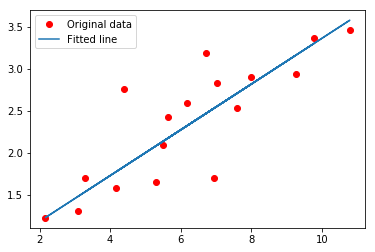

In [13]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for x,y in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()